In [ ]:
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 99.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import numpy as np
import os
import pickle
import random
from IPython.display import clear_output
from google.colab import files
from sklearn import cluster
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

sns.set_style("darkgrid")

In [ ]:
def load_dataset():
    uploaded = files.upload()

    for fn in uploaded.keys():
        print('User uploaded file "{name}" with length {length} bytes.'.format(name=fn, length=len(uploaded[fn])))

    !mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json
    !kaggle datasets download -d jarvisgroot/brain-tumor-classification-mri-images
    !unzip brain-tumor-classification-mri-images.zip
    clear_output()

def setup_dataset():
    data_path = '/content/brain_tumor_mri/new_dataset/bt_images'

    training_data_path = os.path.join(data_path, '/content/brain_tumor_mri/new_dataset/training_data.pickle')
    labels_path = os.path.join(data_path, '/content/brain_tumor_mri/new_dataset/labels.pickle')
    test_data_path = os.path.join(data_path, '/content/test_images-20210704T210303Z-001/test_images')

    with open(training_data_path, 'rb') as training_data_file:
        training_data = pickle.load(training_data_file)

    with open(labels_path, 'rb') as labels_file:
        labels = pickle.load(labels_file)

    return training_data, labels

load_dataset()
training_data, labels = setup_dataset()

In [ ]:
random.shuffle(training_data)

In [ ]:
total_data_len = len(training_data)
classes = ['Meningioma', 'Glioma', 'Pituitary']
n_classes = len(classes)

x_raw = []
y_raw = []

for i in training_data:
    x_raw.append(i[0])
    y_raw.append(i[1])

y_raw = list(np.asarray(y_raw) - np.ones(total_data_len, dtype=np.intc))

In [ ]:
print(f'Total number of images : {total_data_len}')

Total number of images : 3064


Pituitary


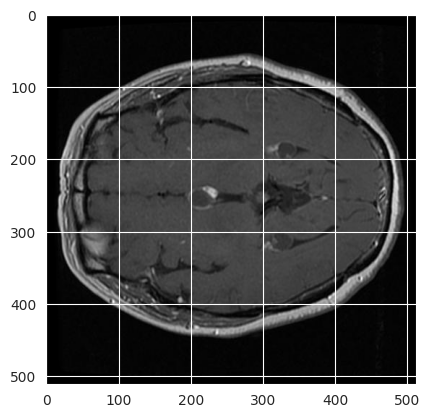

In [ ]:
plt.imshow(x_raw[0])
print(classes[y_raw[0]])

Number of scans with Meningioma : 708 Glioma : 1426 Pituitary : 930


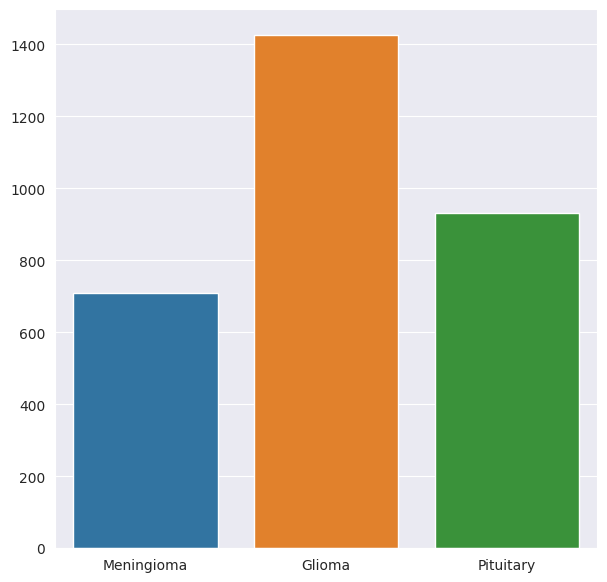

In [ ]:
each_class = [0, 0, 0]

for i in y_raw:
    for j in range(n_classes):
        if i == j:
            each_class[j] = each_class[j] + 1

print(f'Number of scans with Meningioma : {each_class[0]} Glioma : {each_class[1]} Pituitary : {each_class[2]}')
ax, fig = plt.subplots(figsize=[7, 7])
sns.barplot(x=classes, y=each_class)
plt.show()

In [ ]:
sample = []
sample_size = 4

for i in range(n_classes):
    temp = []
    key = 0
    while True:
        index = y_raw.index(i, key, total_data_len - 1)
        key = index + 1
        temp.append(x_raw[index])

        if len(temp) == sample_size:
            break

    sample.append(temp)

sample = np.asarray(sample)
print(f'sample contains {len(sample)} classes with {len(sample[0])} samples in each class')

sample contains 3 classes with 4 samples in each class


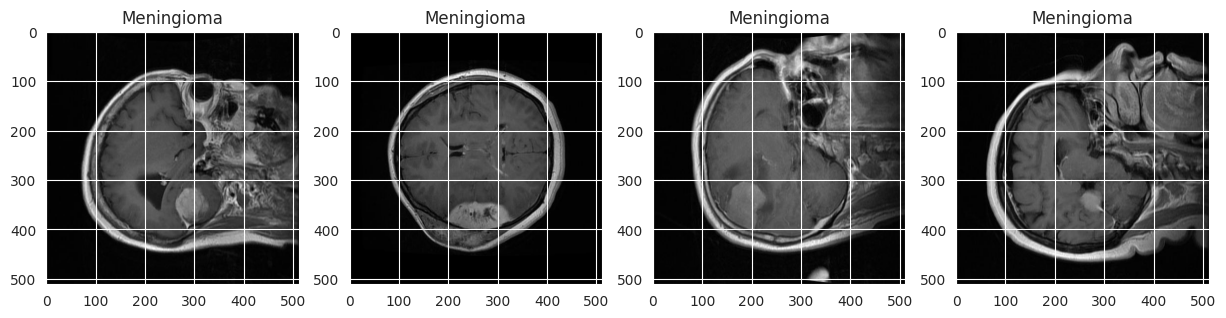

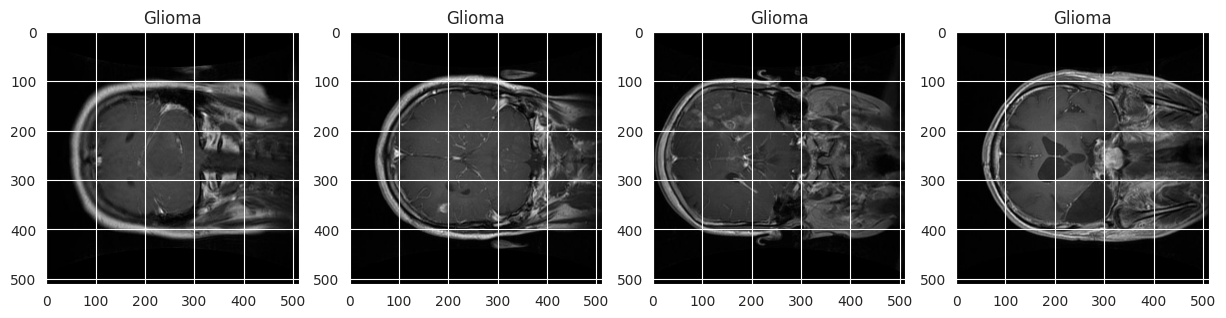

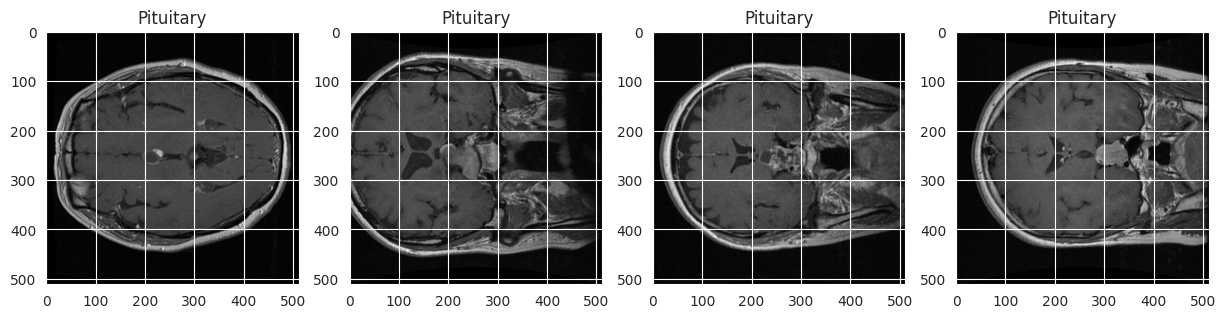

In [ ]:
for i in range(n_classes):
    fig = plt.figure(figsize=(15, 15))
    for j in range(sample_size):
        fig.add_subplot(i + 1, sample_size, j + 1)
        plt.title(classes[i])
        plt.imshow(sample[i][j])

In [ ]:
def clustered_img(x):
    kmeans = cluster.KMeans(5)
    dims = np.shape(x)
    pixel_matrix = np.reshape(x, (dims[0] * dims[1], dims[2]))
    clustered = kmeans.fit_predict(pixel_matrix)

    clustered_img = np.reshape(clustered, (dims[0], dims[1]))
    return clustered_img

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

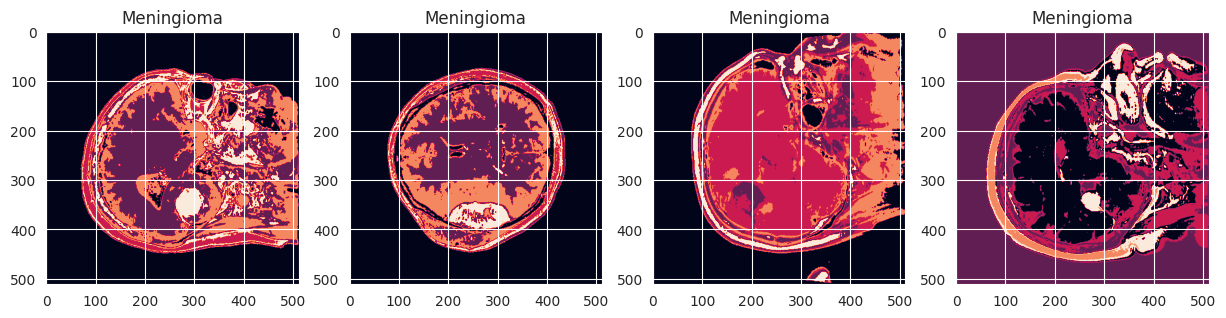

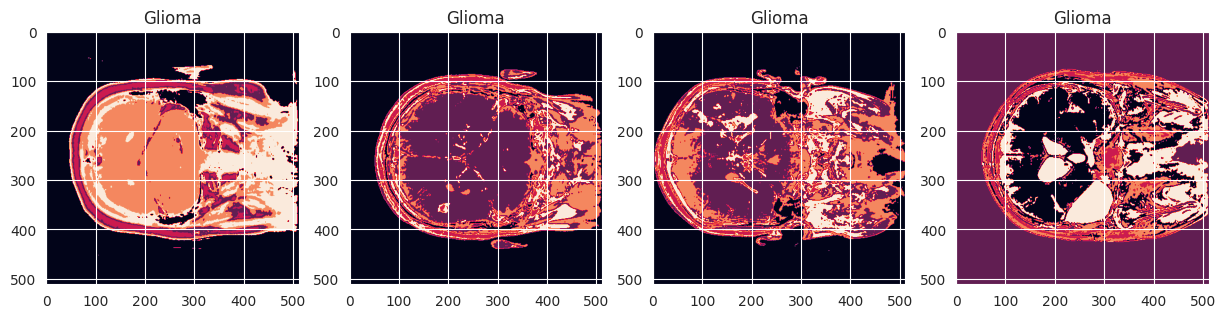

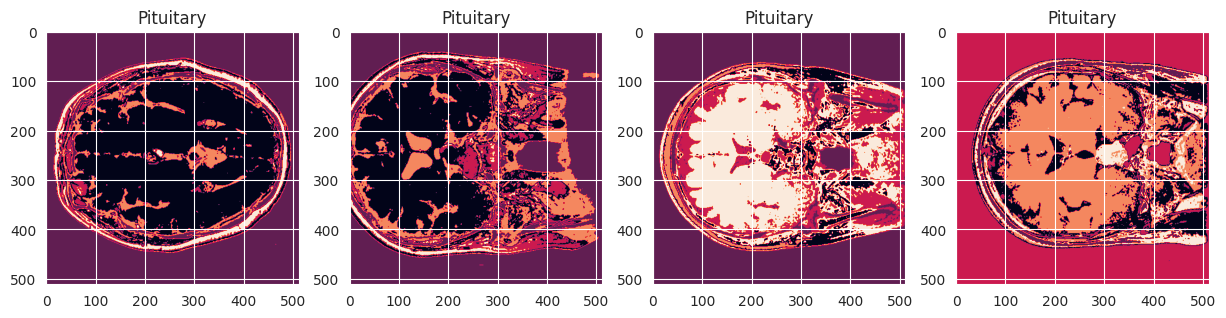

In [ ]:
for i in range(n_classes):
    fig = plt.figure(figsize=(15, 15))
    for j in range(sample_size):
        fig.add_subplot(i + 1, sample_size, j + 1)
        plt.title(classes[i])
        plt.imshow(clustered_img(sample[i][j]))

In [ ]:
n_train = int(0.95 * total_data_len)
n_validation = int(0.021 * total_data_len)

train_image = x_raw[:n_train]
train_label = y_raw[:n_train]

validation_image = x_raw[n_train:n_train + n_validation]
validation_label = y_raw[n_train:n_train + n_validation]

test_image = x_raw[n_train:n_train + n_validation:]
test_label = y_raw[n_train:n_train + n_validation:]

In [ ]:
train_image = np.array(train_image)
train_label = np.array(train_label)

validation_image = np.array(validation_image)
validation_label = np.array(validation_label)

test_image = np.array(test_image)
test_label = np.array(test_label)

In [ ]:
train_image.shape

(2910, 512, 512, 3)

1. 227 × 227  ×  3 input layer
2. 128 6 × 6  ×  3 convolutions with stride [4 4] and padding [0 0 0 0] - 56 x 56 x 128
Weights: 6 × 6  ×  3  ×  128
Bias: 1 × 1  ×  128
3. ReLU-1 - 56 × 56 × 128
4. Cross-channel normalization - 56 × 56 × 128
5. 2 × 2 max pooling with stride [2 2] and padding [0 0 0 0] - 28 × 28 × 128
6. 96 2 × 2  ×  128 convolutions with stride [1 1] and padding [2 2 2 2] - 31 × 31 × 96
Weights: 2  ×  2 ×   128   ×  96
Bias: 1 × 1  ×  96
7. ReLU-2 - 31 × 31 × 96
8. 2 × 2 max pooling with stride [2 2] and padding [0 0 0 0] - 15 × 15 × 96
9. 512 fully connected layer - 1 × 1 × 512
Weights: 512  × 21,600
Bias: 512 × 1
10. 30% dropout - 1 × 1 × 512
11. 2 fully connected layer - 1 × 1 × 2
Weights: 2 ×  512
Bias: 2 × 1
12. Softmax - 1 × 1 × 2
13. Output with ‘ No tumor’ and ‘tumor’

In [ ]:
# Define the model
model = tf.keras.models.Sequential([
    # Input Layer
    tf.keras.layers.InputLayer(input_shape=(512, 512, 3)),

    # Convolutional Layer 1
    tf.keras.layers.Conv2D(128, (6, 6), strides=(4, 4), padding='valid'),
    tf.keras.layers.Activation('relu'),  # ReLU-1
    tf.keras.layers.Lambda(lambda x: tf.nn.local_response_normalization(x)),  # Cross-channel normalization
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),

    # Convolutional Layer 2
    tf.keras.layers.Conv2D(96, (2, 2), strides=(1, 1), padding='same'),
    tf.keras.layers.Activation('relu'),  # ReLU-2
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),

    # Flatten the output to pass to fully connected layers
    tf.keras.layers.Flatten(),

    # Fully Connected Layer 1
    tf.keras.layers.Dense(512),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.3),  # 30% dropout

    # Fully Connected Layer 2
    tf.keras.layers.Dense(2),
    tf.keras.layers.Activation('softmax')  # Softmax for output
])

# Display model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 127, 127, 128)     13952     
                                                                 
 activation (Activation)     (None, 127, 127, 128)     0         
                                                                 
 lambda (Lambda)             (None, 127, 127, 128)     0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 63, 63, 96)        49248     
                                                                 
 activation_1 (Activation)   (None, 63, 63, 96)        0         
                                                        

In [ ]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

batch_size = 32
epochs = 10

history = model.fit(
    train_image,
    train_label,
    batch_size = batch_size,
    epochs = epochs,
    validation_data = (validation_image, validation_label)
)

Epoch 1/10
91/91 [==============================] - 48s 385ms/step - loss: nan - accuracy: 0.2333 - val_loss: nan - val_accuracy: 0.1875
Epoch 2/10
91/91 [==============================] - 34s 369ms/step - loss: nan - accuracy: 0.2333 - val_loss: nan - val_accuracy: 0.1875
Epoch 3/10
91/91 [==============================] - 33s 366ms/step - loss: nan - accuracy: 0.2333 - val_loss: nan - val_accuracy: 0.1875
Epoch 4/10
91/91 [==============================] - 33s 364ms/step - loss: nan - accuracy: 0.2333 - val_loss: nan - val_accuracy: 0.1875
Epoch 5/10
91/91 [==============================] - 33s 362ms/step - loss: nan - accuracy: 0.2333 - val_loss: nan - val_accuracy: 0.1875
Epoch 6/10
91/91 [==============================] - 33s 361ms/step - loss: nan - accuracy: 0.2333 - val_loss: nan - val_accuracy: 0.1875
Epoch 7/10
91/91 [==============================] - 33s 359ms/step - loss: nan - accuracy: 0.2333 - val_loss: nan - val_accuracy: 0.1875
Epoch 8/10
91/91 [=======================